### Exercises
Build three models for our own toy dataset and compare the results.

For this exercise we will build our dataset with some random noise in it, to make it more realistic.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2025-11-03 11:55:03.674421: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-03 11:55:03.674964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-03 11:55:03.675825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-03 11:55:03.682931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Create dataset

In [2]:
# Input values of our dataset
X = np.arange(-100, 100, 4)
len(X)

50

In [3]:
# Target values have some noise
y = 0.75*X+5*np.random.randn(len(X), ) # np.random.randn gives us some normally distributed noise
len(y)

50

In [4]:
# Split data into train and test sets with scikit-learn's train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test_size 20 %

len(X_train), len(X_test)

(40, 10)

In [5]:
# Let's have a look at the shapes
X_train.shape, y_train.shape

((40,), (40,))

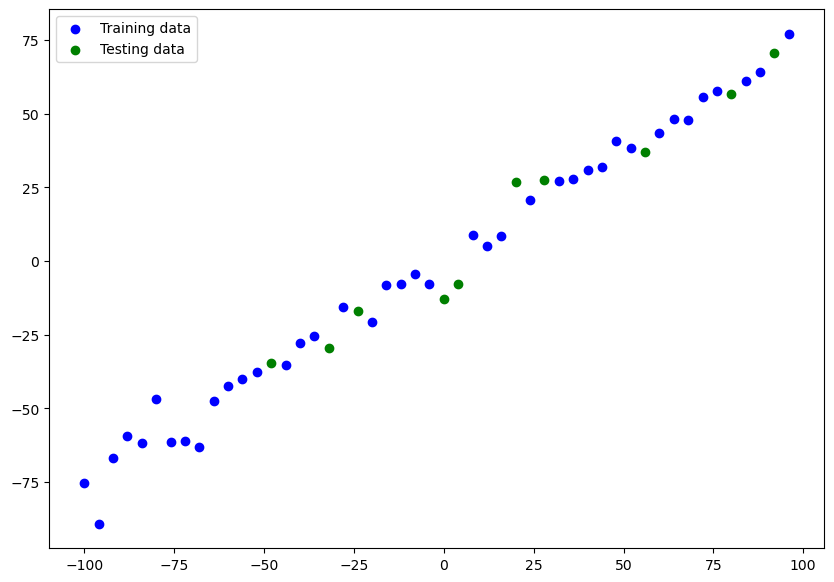

In [6]:
# Time to visualize our data
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show the legend
plt.legend();

### model_1

`model_1`   2 dense layers with 10 units (neurons), activation relu, 1 dense layer as output
            Mean Absolute Error as loss function and metrics, Stochastic Gradient Descent as optimizer
            Train for 50 epochs

In [ ]:
# Set random seed as 42


# Create the model:


# Compile the model


# Fit the model


# Save the model in the .keras format



### Solution:

In [7]:
# Set random seed
tf.random.set_seed(42)

# Create the model:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50, verbose=1)

Epoch 1/50


2025-11-03 11:56:53.484886: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43604 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:41:00.0, compute capability: 8.6
2025-11-03 11:56:54.328324: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fc260c5b800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-03 11:56:54.328366: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2025-11-03 11:56:54.342860: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1762167414.407769 1623159 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 [==============================] - 1s 11ms/step - loss: 38.8346 - mae: 38.8346
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 14.8416 - mae: 14.8416
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 17.4677 - mae: 17.4677
Epoch 4/50
2/2 [==============================] - 0s 3ms/step - loss: 16.9746 - mae: 16.9746
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 14.3881 - mae: 14.3881
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 17.3165 - mae: 17.3165
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 15.4568 - mae: 15.4568
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 12.2771 - mae: 12.2771
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 12.8802 - mae: 12.8802
Epoch 10/50
2/2 [==============================] - 0s 3ms/step - loss: 9.8806 - mae: 9.8806
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 21.0551 - 

In [8]:
model_1.save('./model_1.keras')

### Make predictions

In [9]:
# Make predictions
y_preds_1 = model_1.predict(tf.expand_dims(X_test, -1))

1/1 [==============================] - 0s 64ms/step


In [10]:
# Functionalize the plot:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds_1):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions",)
  # Show the legend
  plt.legend();

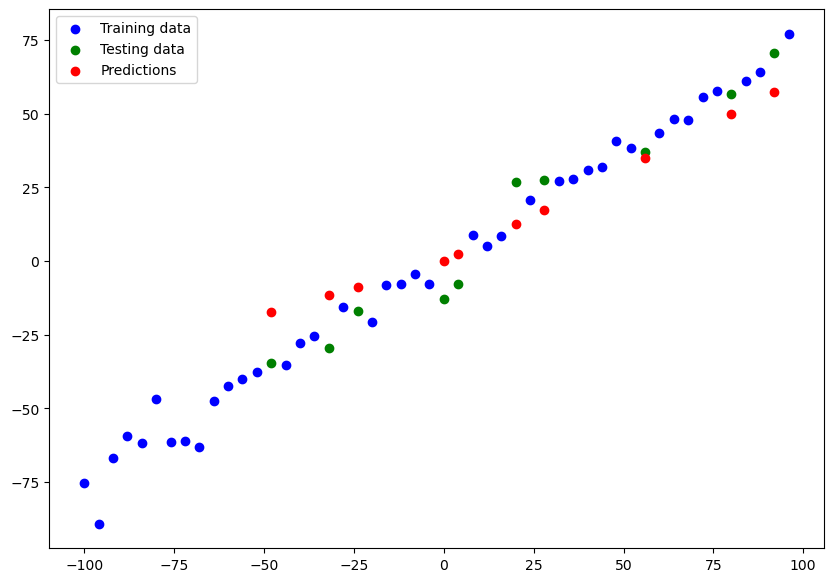

In [11]:
plot_predictions(predictions=y_preds_1)

These results look quite good. Let's see, if we can improve them even more. SGD seems to overshoot the minimum. We could reduce the learning rate or choose a different optimizer:

### model_2

`model_2`   2 dense layers with 10 units (neurons), activation relu, 1 dense layer as output
            Mean Absolute Error as loss function and metrics, Adam as optimizer
            Train for 50 epochs

In [ ]:
# Set random seed as 42


# Create the model:


# Compile the model


# Fit the model


# Save the model in the .keras format



### Solution:

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50, verbose=1)

Epoch 1/50


2025-11-03 11:59:54.937848: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


2/2 [==============================] - 1s 7ms/step - loss: 54.2266 - mae: 54.2266
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 53.4915 - mae: 53.4915
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 52.7743 - mae: 52.7743
Epoch 4/50
2/2 [==============================] - 0s 3ms/step - loss: 52.0701 - mae: 52.0701
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 51.3521 - mae: 51.3521
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 50.6430 - mae: 50.6430
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 49.9476 - mae: 49.9476
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 49.1969 - mae: 49.1969
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 48.5215 - mae: 48.5215
Epoch 10/50
2/2 [==============================] - 0s 3ms/step - loss: 47.7797 - mae: 47.7797
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 47.0785 -

In [13]:
model_2.save('./model_2.keras')

### Make predictions

In [14]:
y_preds_2 = model_2.predict(tf.expand_dims(X_test,-1))

1/1 [==============================] - 0s 44ms/step


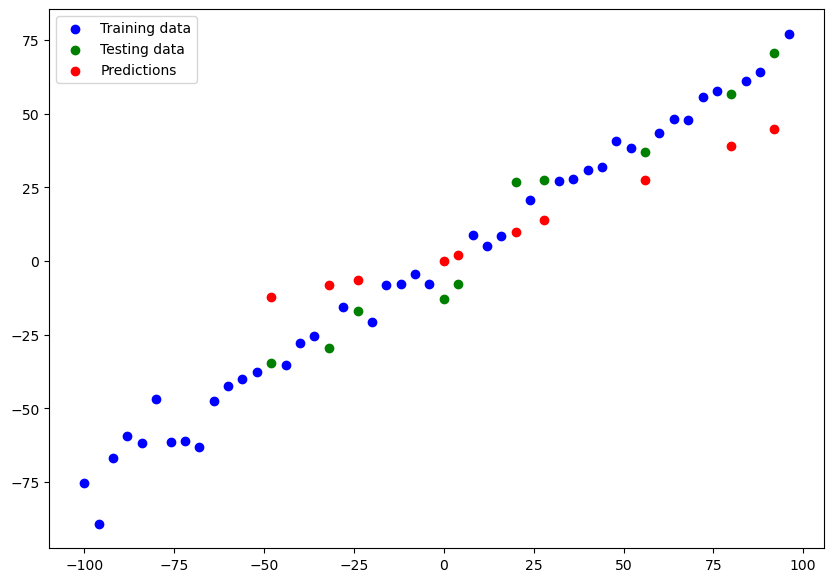

In [15]:
plot_predictions(predictions= y_preds_2)

This looks worse, however, the loss seems to still be going down. Maybe we should train for longer.

### model_3

`model_3`   2 dense layers with 10 units (neurons), activation relu, 1 dense layer as output
            Mean Absolute Error as loss function and metrics, Adam as optimizer
            Train for 200 epochs

In [ ]:
# Set random seed as 42


# Create the model:


# Compile the model


# Fit the model


# Save the model in the .keras format



### Solution:

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [17]:
model_3.save('./model_3.keras')

### Make predictions

In [18]:
y_preds_3 = model_3.predict(tf.expand_dims(X_test,-1))

1/1 [==============================] - 0s 44ms/step


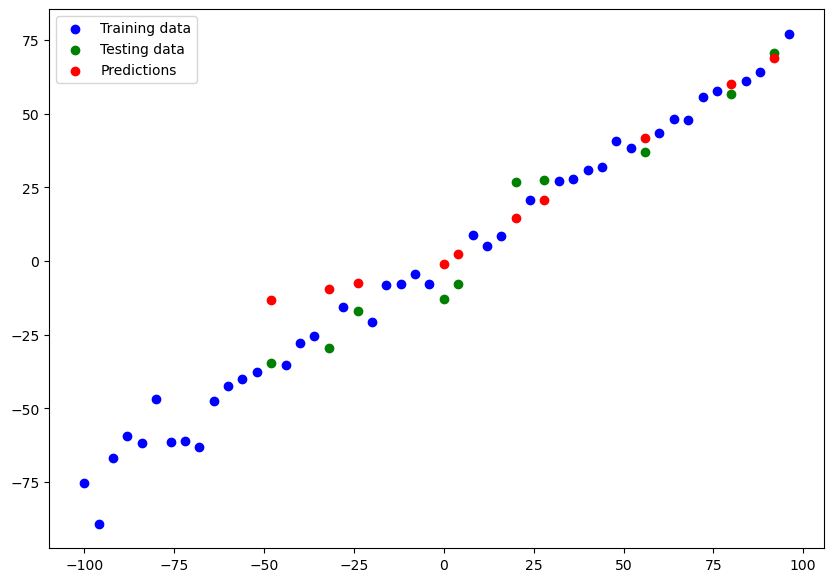

In [19]:
plot_predictions(predictions= y_preds_3)

Much better again. However, compared to the plot of model_1 there is not a great deal of difference, even though the loss has gone down considerably. It seems our model is overfitting.